In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

Loading data from local source and naming it as df

In [21]:
 df = pd.read_csv('https://gist.githubusercontent.com/johnburnmurdoch/4199dbe55095c3e13de8d5b2e5e5307a/raw/fa018b25c24b7b5f47fd0568937ff6c04e384786/city_populations', 
                  usecols=['name', 'group', 'year', 'value'])
# df.head(3)
# df=pd.read_csv(r'C:\Users\AB\Desktop\BC&CC\crimes_18_small.csv')
# usecols=['name', 'group', 'year', 'value'
df.head(10)

,name,group,year,value
0,Agra,India,1575,200.0
1,Agra,India,1576,212.0
2,Agra,India,1577,224.0
3,Agra,India,1578,236.0
4,Agra,India,1579,248.0
5,Agra,India,1580,260.0
6,Agra,India,1581,272.0
7,Agra,India,1582,284.0
8,Agra,India,1583,296.0
9,Agra,India,1584,308.0


In [22]:
current_year = 2018
dff = (df[df['year'].eq(current_year)]
       .sort_values(by='value', ascending=True)
       .head(10))
dff

,name,group,year,value
2537,Karachi,Asia,2018,18185.2
4327,New York,North America,2018,18713.0
1336,Dhaka,Asia,2018,19632.6
1195,Cairo,Middle East,2018,19849.6
4679,Osaka,Asia,2018,20409.0
3574,Mexico City,Latin America,2018,21520.4
5445,Sao Paulo,Latin America,2018,21697.8
3748,Mumbai,India,2018,22120.0
689,Beijing,Asia,2018,22674.2
5547,Shanghai,Asia,2018,25778.6


<BarContainer object of 10 artists>

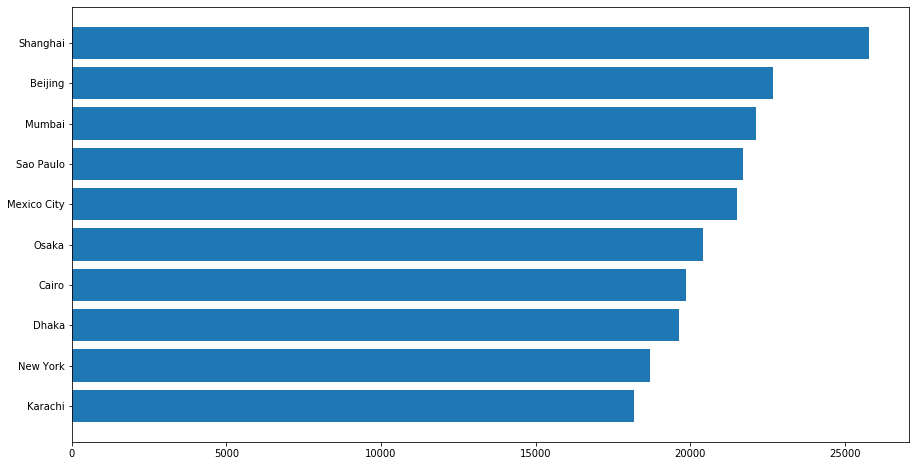

In [23]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['name'], dff['value'])

In [24]:
colors = dict(zip(
    ['India', 'Europe', 'Asia', 'Latin America',
     'Middle East', 'North America', 'Africa'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50']
))
group_lk = df.set_index('name')['group'].to_dict()
print(group_lk.values())

dict_values(['India', 'India', 'Europe', 'Asia', 'Asia', 'Europe', 'India', 'Europe', 'North America', 'Latin America', 'Middle East', 'North America', 'India', 'India', 'Asia', 'Europe', 'Middle East', 'Middle East', 'India', 'Asia', 'Asia', 'Europe', 'Asia', 'India', 'Asia', 'Europe', 'Europe', 'North America', 'India', 'Europe', 'Middle East', 'Latin America', 'Europe', 'India', 'Asia', 'Europe', 'North America', 'Asia', 'Europe', 'Asia', 'North America', 'Latin America', 'Europe', 'Latin America', 'Asia', 'Asia', 'Asia', 'Middle East', 'Asia', 'Europe', 'Europe', 'India'])


             name          group  year    value
2537      Karachi           Asia  2018  18185.2
4327     New York  North America  2018  18713.0
1336        Dhaka           Asia  2018  19632.6
1195        Cairo    Middle East  2018  19849.6
4679        Osaka           Asia  2018  20409.0
3574  Mexico City  Latin America  2018  21520.4
5445    Sao Paulo  Latin America  2018  21697.8
3748       Mumbai          India  2018  22120.0
689       Beijing           Asia  2018  22674.2
5547     Shanghai           Asia  2018  25778.6


Text(1, 0, 'by manoj')

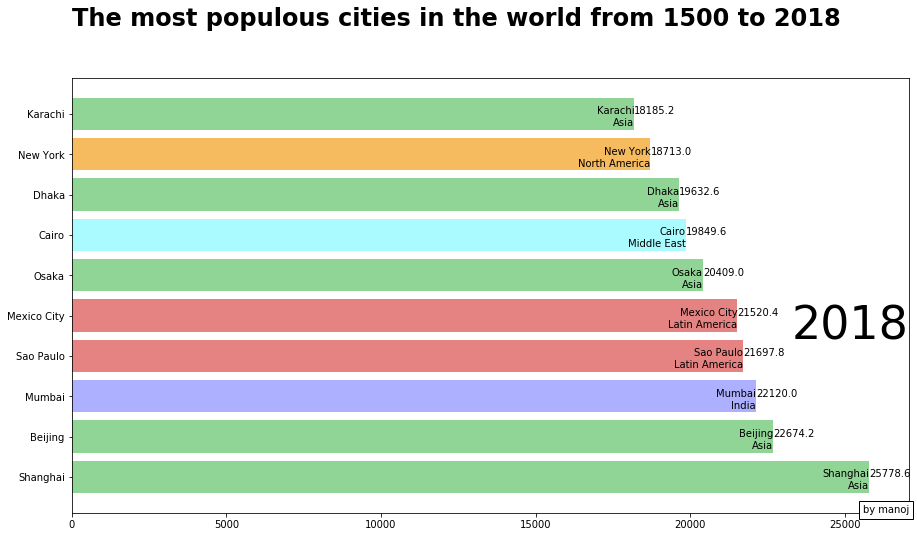

In [25]:
print(dff)
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)



for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-.30, group_lk[name],  ha='right')  # Asia: group name
    ax.text(value, i,     value,           ha='left')   # 38194.2: value
    
    
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')
ax.text(0, 1.12, 'The most populous cities in the world from 1500 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left')



ax.text(1, 0, 'by manoj', transform=ax.transAxes, ha='right',
            color='#000000', bbox=dict(facecolor='white', alpha=1, edgecolor='black'))

loading


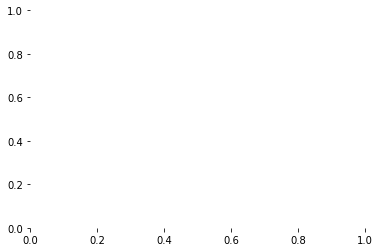

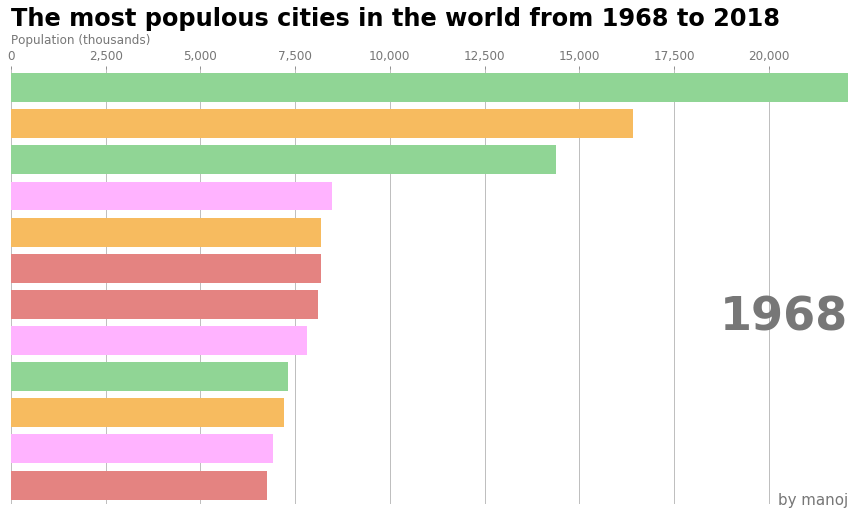

In [33]:
import time
def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='value', ascending=True).tail(20)
    ax.clear()
    
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    
#     for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
#         ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
#         ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
#         ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
#     # ... polished styles
    
    #to  show  the year
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777',rotation=0, size=46, ha='right', weight=800)
    # to show the data on short line ablove bar graph
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    #to set the scale positions
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    time.sleep(0.005)
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0,1.10, 'The most populous cities in the world from 1968 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1,0, 'by manoj', transform=ax.transAxes, ha='right',
            color='#777777', size='15',bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2018)
print('loading')
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1968, 2019))
HTML(animator.to_jshtml()) 

In [27]:

# or use animator.to_html5_video() or animator.save()

[(-1, 1), (-3, 3)]

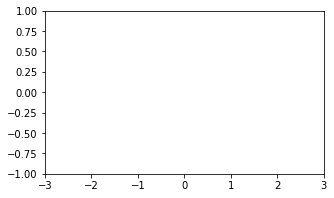

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(-3, 3), ylim=(-1, 1))

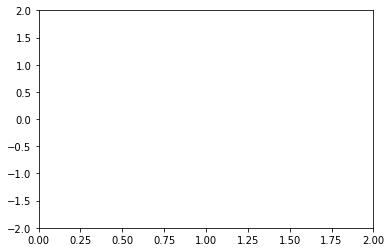

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()